In [2]:
import pandas as pd
import os



In [3]:
# Read data into papers
papers = pd.read_csv("new_papers.csv")

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# Data Cleaning

In [4]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)

In [5]:
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


Remove punctuation/lower casing

In [6]:
# Load the regular expression library
import re

In [7]:
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

In [8]:
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

In [9]:
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    767\n\nself-organization of associative databa...
1    683\n\na mean field theory of layer iv of visu...
2    394\n\nstoring covariance by the associative\n...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
Name: paper_text_processed, dtype: object

# Exploratory Analysis

In [9]:
pip install wordcloud


In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

In [11]:
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

In [12]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

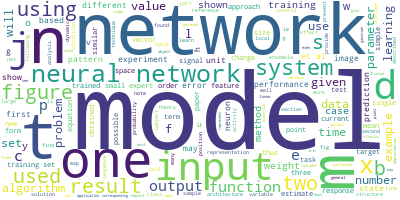

In [13]:
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# Prepare data for LDA Analysis

In [14]:
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
#print(data_words)
data_words = remove_stopwords(data_words)
lemmatizer = WordNetLemmatizer()
dt=[]
c=0;
for i in data_words:
    d=[];
    for j in i:
        #print(lemmatizer.lemmatize(j))
        d.append(lemmatizer.lemmatize(j));
        #d=d+1;
    dt.append(d)
print(dt[:1][0][:100])
#print(data_words[:1][0][:100])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['self', 'organization', 'associative', 'database', 'application', 'hisashi', 'suzuki', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka', 'japan', 'abstract', 'efficient', 'method', 'self', 'organizing', 'associative', 'database', 'proposed', 'together', 'application', 'robot', 'eyesight', 'system', 'proposed', 'database', 'associate', 'input', 'output', 'first', 'half', 'part', 'discussion', 'algorithm', 'self', 'organization', 'proposed', 'aspect', 'hardware', 'produce', 'new', 'style', 'neural', 'network', 'latter', 'half', 'part', 'applicability', 'handwritten', 'letter', 'recognition', 'autonomous', 'mobile', 'robot', 'system', 'demonstrated', 'introduction', 'let', 'mapping', 'given', 'finite', 'infinite', 'set', 'another', 'finite', 'infinite', 'set', 'learning', 'machine', 'observes', 'set', 'pair', 'sampled', 'randomly', 'mean', 'cartesian', 'product', 'computes', 'estimate', 'make', 'small', 'estimation', 'error', 'measure', 'usually', 'say', 'faster', 'decreas

In [ ]:
pip install nltk.corpus

In [15]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(dt)
print(id2word)
# Create Corpus
texts = dt

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:100])


Dictionary(12884 unique tokens: ['abolish', 'abstract', 'accelerate', 'acceptable', 'accomplishes']...)
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 6), (6, 1), (7, 1), (8, 3), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 4), (17, 8), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 6), (30, 2), (31, 1), (32, 1), (33, 1), (34, 5), (35, 3), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 7), (42, 1), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 13), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 2), (59, 2), (60, 1), (61, 4), (62, 5), (63, 4), (64, 3), (65, 1), (66, 2), (67, 2), (68, 4), (69, 1), (70, 3), (71, 1), (72, 3), (73, 9), (74, 1), (75, 2), (76, 6), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 2), (87, 1), (88, 11), (89, 4), (90, 1), (91, 1), (92, 1), (93, 7), (94, 1), (95, 1), (96, 1), (97, 1), (98, 4), (99, 1)]


# LDA model training

In [16]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
#print(doc_lda)

[(0,
  '0.010*"network" + 0.007*"function" + 0.006*"model" + 0.005*"input" + '
  '0.005*"learning" + 0.005*"time" + 0.005*"neural" + 0.004*"parameter" + '
  '0.004*"set" + 0.004*"one"'),
 (1,
  '0.012*"network" + 0.007*"model" + 0.006*"function" + 0.006*"neural" + '
  '0.006*"learning" + 0.006*"training" + 0.005*"set" + 0.005*"system" + '
  '0.005*"input" + 0.005*"one"'),
 (2,
  '0.008*"model" + 0.007*"learning" + 0.006*"network" + 0.006*"function" + '
  '0.006*"system" + 0.006*"set" + 0.005*"input" + 0.005*"training" + '
  '0.005*"neural" + 0.005*"figure"'),
 (3,
  '0.008*"input" + 0.008*"model" + 0.006*"network" + 0.006*"data" + '
  '0.005*"system" + 0.005*"set" + 0.005*"training" + 0.005*"error" + '
  '0.005*"algorithm" + 0.005*"function"'),
 (4,
  '0.009*"network" + 0.007*"model" + 0.007*"system" + 0.006*"set" + '
  '0.006*"neural" + 0.005*"function" + 0.005*"input" + 0.005*"using" + '
  '0.005*"time" + 0.004*"learning"'),
 (5,
  '0.011*"network" + 0.008*"system" + 0.008*"set" + 0.

# Analyzing LDA model results

In [18]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\DELL\anaconda\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\DELL\anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.003246 -0.006555       1        1  18.573389
0     -0.002388 -0.000996       2        1  15.987396
5     -0.004870  0.000122       3        1  12.721378
8      0.015575 -0.006880       4        1  12.670598
7      0.004498 -0.005442       5        1  11.555586
1      0.007645  0.010849       6        1  11.334603
9     -0.011724 -0.001055       7        1   7.490698
3     -0.004127 -0.005659       8        1   4.214597
2      0.000638  0.008015       9        1   3.525774
6     -0.002002  0.007601      10        1   1.925982, topic_info=          Term         Freq        Total Category  logprob  loglift
301   function   981.000000   981.000000  Default  30.0000  30.0000
471    network  1668.000000  1668.000000  Default  29.0000  29.0000
724     system   915.000000   915.000000  Default  28.0000  28.0000
400   learning   991.000000   991.000000  Default  27.0000  27.0000
17   algorithm   584.000000   584.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
494        one    10.837666   702.135915  Topic10  -5.7094  -0.2214
760        two     9.922638   590.852454  Topic10  -5.7976  -0.1370
364      input    12.359855   961.466026  Topic10  -5.5779  -0.4043
484     number     8.903576   485.730155  Topic10  -5.9059  -0.0495
778      value     8.904368   549.685792  Topic10  -5.9059  -0.1731

[849 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
5246       1  0.106340  accent
5246       2  0.106340  accent
5246       3  0.106340  accent
5246       4  0.106340  accent
5246       5  0.319019  accent
...      ...       ...     ...
6272       1  0.316871    ziij
6272       2  0.316871    ziij
6275       1  0.320319    zkij
6275       2  0.320319    zkij
10883      3  0.361378      zn

[3355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 6, 9, 8, 2, 10, 4, 3, 7])

# LSI model Training

In [17]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [18]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=10)
pprint(lsi_model.print_topics())
corpus_lsi = lsi_model[corpus_tfidf]

[(0,
  '0.145*"expert" + 0.093*"training" + 0.092*"image" + 0.086*"generalization" '
  '+ 0.085*"ensemble" + 0.082*"eye" + 0.081*"recognition" + 0.080*"node" + '
  '0.076*"weight" + 0.076*"cell"'),
 (1,
  '-0.267*"expert" + 0.200*"eye" + 0.159*"orientation" + 0.153*"dominance" + '
  '0.151*"ocular" + 0.151*"cell" + 0.150*"spike" + -0.133*"ensemble" + '
  '0.124*"motion" + 0.114*"cortex"'),
 (2,
  '0.366*"expert" + -0.338*"plasma" + -0.181*"tokamak" + 0.164*"rfwr" + '
  '0.148*"dominance" + 0.141*"ocular" + 0.140*"orientation" + '
  '0.120*"receptive" + 0.112*"ridge" + 0.108*"eye"'),
 (3,
  '0.374*"expert" + -0.295*"student" + 0.292*"plasma" + -0.237*"ensemble" + '
  '-0.178*"generalization" + 0.157*"rfwr" + 0.156*"tokamak" + '
  '-0.131*"ambiguity" + 0.108*"ridge" + 0.092*"interference"'),
 (4,
  '0.398*"plasma" + 0.223*"student" + 0.213*"tokamak" + 0.209*"ensemble" + '
  '-0.161*"image" + -0.142*"gesture" + -0.138*"recognition" + '
  '-0.137*"template" + -0.127*"frame" + 0.113*"magnet

#  Coherence Scores

Topic coherence is a way to judge the quality of topics via a single quantitative, scalar value. There are many ways to compute the coherence score. For the u_mass and c_v options, a higher is always better. Note that c_v is between 0 and 1.


0 <= c_v <= 1

The coherence score is an aggregation of the following.

segmentation

probability estimation

confirmation measure

In [20]:
from gensim.models.coherencemodel import CoherenceModel

cm = CoherenceModel(model=lsi_model, corpus=corpus_tfidf, coherence='u_mass')
score= cm.get_coherence()
print(score)

-7.587105557900846


In [21]:
import pandas as pd

results1 = []

for t in range(2, 30):
    lsi_model = models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=t)
    corpus_lsi = lsi_model[corpus_tfidf]
    cm = CoherenceModel(model=lsi_model, corpus=corpus_tfidf, coherence='u_mass')
    score = cm.get_coherence()
    print("score:",score)
    tup = t, score
    results1.append(tup)

results1 = pd.DataFrame(results1, columns=['topic', 'score'])

C:\Users\DELL\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


score: -4.060216684661561
score: -5.515277778247022
score: -6.264454081106207
score: -6.129361074038219
score: -6.951958325043345
score: -8.097646994239062
score: -7.330783469106083
score: -6.394985340102299
score: -6.5290478242373995
score: -6.593099968570545
score: -8.018285740953937
score: -7.5830093891677715
score: -8.835403470388247
score: -8.467285147575158
score: -8.937521472504507
score: -8.738835751126018
score: -9.607827544252208
score: -9.758788606199786
score: -10.103142719922351
score: -10.913026486826576
score: -10.025057237044127
score: -11.32421732519781
score: -10.50253972978056
score: -11.594394395633937
score: -10.91389239113655
score: -11.523725327719353
score: -11.351659714267472
score: -11.956798270680315


C:\Users\DELL\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


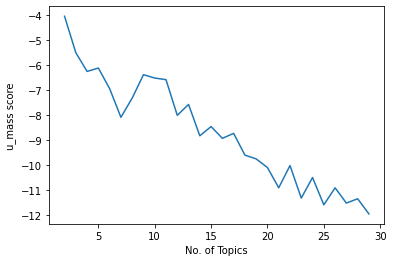

In [22]:
s = pd.Series(results1.score.values, index=results1.topic.values)
_ = s.plot(xlabel="No. of Topics",ylabel="u_mass score")

In [22]:
import pandas as pd

results2 = []

for t in range(2, 30):
    lsi_model = models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=t)
    corpus_lsi = lsi_model[corpus_tfidf]
    cm = CoherenceModel(model=lsi_model, texts=texts, coherence='c_v')
    score = cm.get_coherence()
    print("score:",score)
    tup = t, score
    results2.append(tup)

results2 = pd.DataFrame(results2, columns=['topic', 'score'])

C:\Users\DELL\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


score: 0.3283954740760287
score: 0.3155255587538153
score: 0.33074993763209193
score: 0.3847256332592854
score: 0.3740493479874387
score: 0.36894097766172035
score: 0.39272206072164945
score: 0.3733748908598425
score: 0.377966719200577
score: 0.3754572869614752
score: 0.37836412961513816
score: 0.39874735567548175
score: 0.39115737095284475
score: 0.39833809433197664
score: 0.4245562637977568
score: 0.43312905682141406
score: 0.4413515893838955
score: 0.444431722755374
score: 0.45511326067634783
score: 0.4295310251867904
score: 0.4621030843741867
score: 0.4453733722773
score: 0.4694262282652955
score: 0.4703111700726327
score: 0.4724909365451154
score: 0.46308274679931843
score: 0.4783503878272572
score: 0.480961179943891


C:\Users\DELL\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


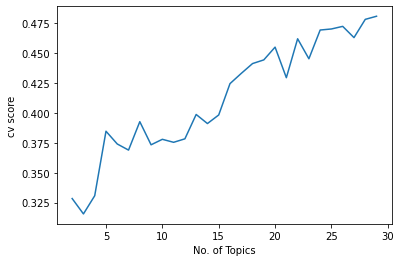

In [23]:
s = pd.Series(results2.score.values, index=results2.topic.values)
_ = s.plot(xlabel="No. of Topics",ylabel="cv score")

For LDA model

In [24]:
import pandas as pd

results3 = []

for t in range(2, 30):
    lda_model = models.LdaModel(corpus_tfidf, id2word=id2word, num_topics=t)
    corpus_lda = lda_model[corpus_tfidf]
    cm = CoherenceModel(model=lda_model, corpus=corpus_tfidf, coherence='u_mass')
    score = cm.get_coherence()
    print("score:",score)
    tup = t, score
    results3.append(tup)

results3 = pd.DataFrame(results3, columns=['topic', 'score'])

C:\Users\DELL\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


score: -3.785316708446195
score: -7.584151131707716
score: -13.42114800756784
score: -13.891721789944171
score: -14.597336097454857
score: -14.295142523555446
score: -13.910635778195893
score: -15.11688725236305
score: -14.246280425542157
score: -14.325849512018003
score: -14.326495428594086
score: -14.735754907990794
score: -13.825084520857615
score: -14.222771364979346
score: -14.107848961435511
score: -13.061367013772253
score: -13.136614419719727
score: -12.60430075520308
score: -13.22598647591098
score: -12.876539402573398
score: -11.559222750385446
score: -11.743524467972671
score: -11.502703827629995
score: -12.435715208705872
score: -10.784898551765092
score: -11.364248013468238
score: -11.407367554357084
score: -10.513480367779366


C:\Users\DELL\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


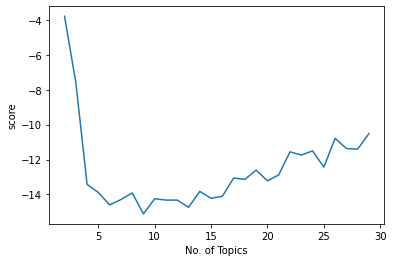

In [26]:
s = pd.Series(results3.score.values, index=results3.topic.values)
_ = s.plot(xlabel="No. of Topics",ylabel="score")

In [ ]:
import pandas as pd

results4 = []

for t in range(2, 30):
    lda_model = models.LdaModel(corpus_tfidf, id2word=id2word, num_topics=t)
    corpus_lda = lda_model[corpus_tfidf]
    cm = CoherenceModel(model=lda_model, texts=texts, coherence='c_v')
    score = cm.get_coherence()
    print("score:",score)
    tup = t, score
    results4.append(tup)

results4 = pd.DataFrame(results4, columns=['topic', 'score'])

score: 0.3170990642040813
score: 0.572040095210363
score: 0.5777425438793669
score: 0.5629450418038591
score: 0.5732844902990512
score: 0.5589410452411545
score: 0.5600722086591186
score: 0.5715339338685551
score: 0.5642290157014123
score: 0.5516607573994888
score: 0.5257375926087468
score: 0.48680362099052943
score: 0.5108761779362639
score: 0.5244744619450654
score: 0.4715122887821755
score: 0.4544651460396418
score: 0.46236913307039285
score: 0.4535260583292371
score: 0.4260160721652933
score: 0.4633626312976405
score: 0.4072008652771936
score: 0.42274657690320955
score: 0.4461013681932913
score: 0.4335990563115489
score: 0.3845648945027002


C:\Users\DELL\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


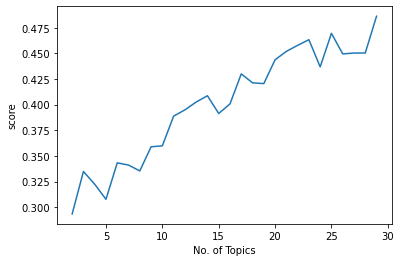

In [39]:
s = pd.Series(results4.score.values, index=results4.topic.values)
_ = s.plot(xlabel="No. of Topics",ylabel="cv score")